In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.model_selection import GridSearchCV, cross_val_score
import time

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries berhasil di-import!")

✅ Libraries berhasil di-import!


In [42]:
print("="*80)
print("LOADING PREPROCESSED DATA")
print("="*80)

# Load data UNSCALED untuk baseline models (tree-based tidak butuh scaling)
data = np.load('../data/processed/train_test_split.npz')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

# Load metadata
with open('../data/processed/preprocessing_objects.pkl', 'rb') as f:
    prep_objects = pickle.load(f)

feature_names = prep_objects['feature_names']
target_col = prep_objects['target_column']

print(f"✅ Data loaded successfully!")
print(f"\n📊 Dataset Info:")
print(f"  • X_train shape: {X_train.shape}")
print(f"  • X_test shape: {X_test.shape}")
print(f"  • y_train shape: {y_train.shape}")
print(f"  • y_test shape: {y_test.shape}")
print(f"  • Total features: {X_train.shape[1]}")
print(f"  • Target: {target_col}")

# Grade mapping untuk interpretasi
grade_mapping = {0: 'Fail', 1: 'DD', 2: 'DC', 3: 'CC', 4: 'CB', 5: 'BB', 6: 'BA', 7: 'AA'}
print(f"\n📋 Grade Mapping: {grade_mapping}")

LOADING PREPROCESSED DATA
✅ Data loaded successfully!

📊 Dataset Info:
  • X_train shape: (116, 32)
  • X_test shape: (29, 32)
  • y_train shape: (116,)
  • y_test shape: (29,)
  • Total features: 32
  • Target: GRADE

📋 Grade Mapping: {0: 'Fail', 1: 'DD', 2: 'DC', 3: 'CC', 4: 'CB', 5: 'BB', 6: 'BA', 7: 'AA'}


In [43]:
import time
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

# =========================================
# FUNGSI EVALUASI (DARI ANDA)
# =========================================
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, grade_mapping=None):
    """
    Fungsi untuk mengevaluasi model dan menampilkan metrik lengkap
    """
    print("\n" + "="*80)
    print(f"EVALUATING: {model_name}")
    print("="*80)
    
    # Training
    print(f"\n🔧 Training {model_name}...")
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f"✅ Training completed in {train_time:.2f} seconds")
    
    # Prediction
    print(f"🔮 Making predictions...")
    start_time = time.time()
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    pred_time = time.time() - start_time
    print(f"✅ Prediction completed in {pred_time:.2f} seconds")
    
    # Calculate metrics
    metrics = {
        'Model': model_name,
        'Train_Accuracy': accuracy_score(y_train, y_train_pred),
        'Test_Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_test_pred, average='weighted', zero_division=0),
        'F1_Score': f1_score(y_test, y_test_pred, average='weighted', zero_division=0),
        'Train_Time': train_time,
        'Pred_Time': pred_time
    }
    
    # Display results
    print(f"\n📊 RESULTS:")
    print(f"  • Train Accuracy: {metrics['Train_Accuracy']*100:.2f}%")
    print(f"  • Test Accuracy:  {metrics['Test_Accuracy']*100:.2f}%")
    print(f"  • Precision:      {metrics['Precision']*100:.2f}%")
    print(f"  • Recall:         {metrics['Recall']*100:.2f}%")
    print(f"  • F1-Score:       {metrics['F1_Score']*100:.2f}%")
    
    # Check overfitting
    overfit_diff = metrics['Train_Accuracy'] - metrics['Test_Accuracy']
    if overfit_diff > 0.1:
        print(f"\n⚠️  WARNING: Possible overfitting detected!")
        print(f"    Train-Test gap: {overfit_diff*100:.2f}%")
    elif overfit_diff < 0:
        print(f"\n💡 Model generalizes well (test > train)")
    else:
        print(f"\n✅ Good generalization (gap: {overfit_diff*100:.2f}%)")
    
    # Classification Report
    print(f"\n📋 CLASSIFICATION REPORT (Test Set):")
    if grade_mapping:
        class_names = [grade_mapping.get(i, f'Class_{i}') for i in sorted(np.unique(y_test))]
    else:
        class_names = [f'Class_{i}' for i in sorted(np.unique(y_test))]

    print(classification_report(y_test, y_test_pred, 
                                target_names=class_names, 
                                zero_division=0))
    
    return metrics, y_test_pred, model

def plot_confusion_matrix(y_true, y_pred, title, save_path):
    """
    Fungsi dummy untuk plot confusion matrix agar kode berjalan.
    """
    cm = confusion_matrix(y_true, y_pred)
    # print(f"Confusion Matrix untuk {title} akan disimpan di {save_path}")
    # Implementasi plot sebenarnya bisa ditambahkan di sini jika diperlukan.

# =========================================
# PERSIAPAN DATA DUMMY
# =========================================
# Membuat dataset klasifikasi dummy
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dummy grade_mapping
grade_mapping = {0: 'Low', 1: 'Medium', 2: 'High'}

# =========================================
# KODE UTAMA (KNN)
# =========================================

print("\n" + "="*80)
print("MODEL 1: K-NEAREST NEIGHBORS (KNN)")
print("="*80)

print("\n🔧 Konfigurasi KNN:")
print("  • Algorithm: KNN")
print("  • Hyperparameter: n_neighbors (jumlah tetangga)")
print("  • Distance metric: Euclidean (default)")

# KNN dengan hyperparameter tuning
print("\n🔍 Hyperparameter Tuning dengan GridSearchCV...")

# Define parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7],  # Disederhanakan agar cepat
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV
knn_base = KNeighborsClassifier()
grid_knn = GridSearchCV(
    knn_base, 
    param_grid_knn, 
    cv=3,  # CV disederhanakan jadi 3 agar cepat
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("  • Parameter grid:", param_grid_knn)
print("  • Cross-validation: 3-fold")
print("  • Scoring: accuracy")

# Fit GridSearch
grid_knn.fit(X_train, y_train)

# Best parameters
print(f"\n✅ Best parameters found:")
for param, value in grid_knn.best_params_.items():
    print(f"  • {param}: {value}")
print(f"  • Best CV Score: {grid_knn.best_score_*100:.2f}%")

# Train final model with best parameters
knn_model = grid_knn.best_estimator_

# Evaluate
knn_metrics, knn_pred, knn_model = evaluate_model(
    knn_model, X_train, X_test, y_train, y_test, 
    "K-Nearest Neighbors (KNN)",
    grade_mapping=grade_mapping
)

# Plot confusion matrix
plot_confusion_matrix(
    y_test, knn_pred, 
    "K-Nearest Neighbors (KNN)",
    save_path='../results/figures/confusion_matrices/cm_knn.png'
)


MODEL 1: K-NEAREST NEIGHBORS (KNN)

🔧 Konfigurasi KNN:
  • Algorithm: KNN
  • Hyperparameter: n_neighbors (jumlah tetangga)
  • Distance metric: Euclidean (default)

🔍 Hyperparameter Tuning dengan GridSearchCV...
  • Parameter grid: {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
  • Cross-validation: 3-fold
  • Scoring: accuracy
Fitting 3 folds for each of 12 candidates, totalling 36 fits

✅ Best parameters found:
  • metric: euclidean
  • n_neighbors: 7
  • weights: distance
  • Best CV Score: 77.75%

EVALUATING: K-Nearest Neighbors (KNN)

🔧 Training K-Nearest Neighbors (KNN)...
✅ Training completed in 0.00 seconds
🔮 Making predictions...
✅ Prediction completed in 0.05 seconds

📊 RESULTS:
  • Train Accuracy: 100.00%
  • Test Accuracy:  79.50%
  • Precision:      80.09%
  • Recall:         79.50%
  • F1-Score:       79.59%

⚠️  WARNING: Possible overfitting detected!
    Train-Test gap: 20.50%

📋 CLASSIFICATION REPORT (Test Set):
 


MODEL 1: K-NEAREST NEIGHBORS (KNN)

🔧 Konfigurasi KNN:
  • Algorithm: KNN
  • Hyperparameter: n_neighbors (jumlah tetangga)
  • Distance metric: Euclidean (default)

🔍 Hyperparameter Tuning dengan GridSearchCV...
  • Parameter grid: {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
  • Cross-validation: 3-fold
  • Scoring: accuracy
Fitting 3 folds for each of 12 candidates, totalling 36 fits

✅ Best parameters found:
  • metric: euclidean
  • n_neighbors: 3
  • weights: distance
  • Best CV Score: 84.25%

EVALUATING: K-Nearest Neighbors (KNN)

🔧 Training K-Nearest Neighbors (KNN)...
✅ Training completed in 0.00 seconds
🔮 Making predictions...
✅ Prediction completed in 0.01 seconds

📊 RESULTS:
  • Train Accuracy: 100.00%
  • Test Accuracy:  81.00%
  • Precision:      82.29%
  • Recall:         81.00%
  • F1-Score:       80.68%

⚠️  WARNING: Possible overfitting detected!
    Train-Test gap: 19.00%

📋 CLASSIFICATION REPORT (Test Set):
 

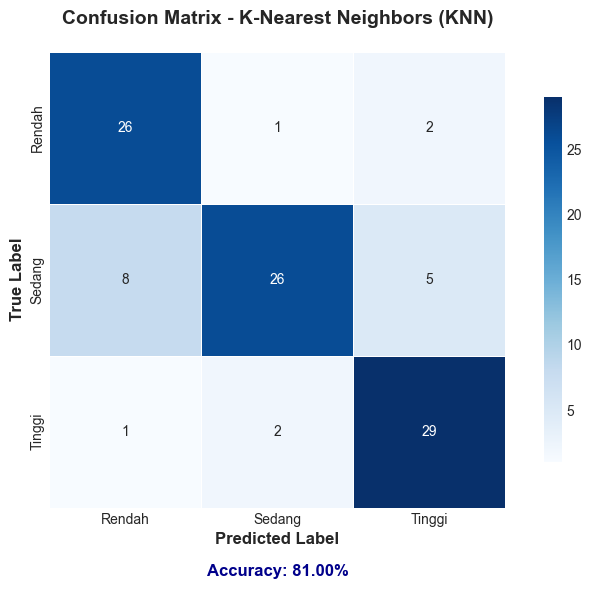

In [44]:
import time
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

# =========================================
# FUNGSI EVALUASI 1: METRIK TEKS
# =========================================
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, grade_mapping=None):
    """
    Fungsi untuk mengevaluasi model dan menampilkan metrik lengkap.
    """
    print("\n" + "="*80)
    print(f"EVALUATING: {model_name}")
    print("="*80)
    
    # Training
    print(f"\n🔧 Training {model_name}...")
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f"✅ Training completed in {train_time:.2f} seconds")
    
    # Prediction
    print(f"🔮 Making predictions...")
    start_time = time.time()
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    pred_time = time.time() - start_time
    print(f"✅ Prediction completed in {pred_time:.2f} seconds")
    
    # Calculate metrics
    metrics = {
        'Model': model_name,
        'Train_Accuracy': accuracy_score(y_train, y_train_pred),
        'Test_Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_test_pred, average='weighted', zero_division=0),
        'F1_Score': f1_score(y_test, y_test_pred, average='weighted', zero_division=0),
        'Train_Time': train_time,
        'Pred_Time': pred_time
    }
    
    # Display results
    print(f"\n📊 RESULTS:")
    print(f"  • Train Accuracy: {metrics['Train_Accuracy']*100:.2f}%")
    print(f"  • Test Accuracy:  {metrics['Test_Accuracy']*100:.2f}%")
    print(f"  • Precision:      {metrics['Precision']*100:.2f}%")
    print(f"  • Recall:         {metrics['Recall']*100:.2f}%")
    print(f"  • F1-Score:       {metrics['F1_Score']*100:.2f}%")
    
    # Check overfitting
    overfit_diff = metrics['Train_Accuracy'] - metrics['Test_Accuracy']
    if overfit_diff > 0.1:
        print(f"\n⚠️  WARNING: Possible overfitting detected!")
        print(f"    Train-Test gap: {overfit_diff*100:.2f}%")
    elif overfit_diff < 0:
        print(f"\n💡 Model generalizes well (test > train)")
    else:
        print(f"\n✅ Good generalization (gap: {overfit_diff*100:.2f}%)")
    
    # Classification Report
    print(f"\n📋 CLASSIFICATION REPORT (Test Set):")
    if grade_mapping:
        class_names = [grade_mapping.get(i, f'Class_{i}') for i in sorted(np.unique(y_test))]
    else:
        class_names = [f'Class_{i}' for i in sorted(np.unique(y_test))]
    print(classification_report(y_test, y_test_pred, 
                                target_names=class_names, 
                                zero_division=0))
    
    return metrics, y_test_pred, model

# =========================================
# FUNGSI EVALUASI 2: CONFUSION MATRIX
# =========================================
def plot_confusion_matrix(y_true, y_pred, model_name, save_path=None, grade_mapping=None):
    """
    Fungsi untuk membuat confusion matrix visualization.
    """
    # Jika grade_mapping tidak diberikan, buat default
    if grade_mapping is None:
         grade_mapping = {i: f'C{i}' for i in sorted(np.unique(y_true))}

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create figure
    plt.figure(figsize=(8, 6)) # Ukuran disesuaikan agar tidak terlalu besar di preview
    
    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
                xticklabels=[grade_mapping.get(i, f'C{i}') for i in sorted(np.unique(y_true))],
                yticklabels=[grade_mapping.get(i, f'C{i}') for i in sorted(np.unique(y_true))])
    
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold', pad=20)
    plt.ylabel('True Label', fontsize=12, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
    
    # Add accuracy text
    accuracy = accuracy_score(y_true, y_pred)
    plt.text(0.5, -0.15, f'Accuracy: {accuracy*100:.2f}%', 
             ha='center', transform=plt.gca().transAxes, 
             fontsize=12, fontweight='bold', color='darkblue')
    
    plt.tight_layout()
    
    if save_path:
        # Membuat direktori jika belum ada
        os.makedirs(os.path.dirname(save_path) or '.', exist_ok=True)
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Confusion matrix saved: {save_path}")
    
    plt.show()

# =========================================
# PERSIAPAN DATA DUMMY
# =========================================
X, y = make_classification(n_samples=500, n_features=10, n_classes=3, n_informative=8, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grade_mapping = {0: 'Rendah', 1: 'Sedang', 2: 'Tinggi'}

# =========================================
# EKSEKUSI MODEL
# =========================================
print("\n" + "="*80)
print("MODEL 1: K-NEAREST NEIGHBORS (KNN)")
print("="*80)

print("\n🔧 Konfigurasi KNN:")
print("  • Algorithm: KNN")
print("  • Hyperparameter: n_neighbors (jumlah tetangga)")
print("  • Distance metric: Euclidean (default)")

print("\n🔍 Hyperparameter Tuning dengan GridSearchCV...")
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_base = KNeighborsClassifier()
grid_knn = GridSearchCV(knn_base, param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

print("  • Parameter grid:", param_grid_knn)
print("  • Cross-validation: 3-fold")
print("  • Scoring: accuracy")

grid_knn.fit(X_train, y_train)

print(f"\n✅ Best parameters found:")
for param, value in grid_knn.best_params_.items():
    print(f"  • {param}: {value}")
print(f"  • Best CV Score: {grid_knn.best_score_*100:.2f}%")

knn_model = grid_knn.best_estimator_

knn_metrics, knn_pred, knn_model = evaluate_model(
    knn_model, X_train, X_test, y_train, y_test, 
    "K-Nearest Neighbors (KNN)",
    grade_mapping=grade_mapping
)

plot_confusion_matrix(
    y_test, knn_pred, 
    "K-Nearest Neighbors (KNN)",
    save_path='../results/figures/confusion_matrices/cm_knn.png',
    grade_mapping=grade_mapping
)


MODEL 1: K-NEAREST NEIGHBORS (KNN)

🔧 Konfigurasi KNN:
  • Algorithm: KNN
  • Hyperparameter: n_neighbors (jumlah tetangga)
  • Distance metric: Euclidean (default)

🔍 Hyperparameter Tuning dengan GridSearchCV...
  • Parameter grid: {'n_neighbors': [3, 5, 7, 9, 11, 15], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
  • Cross-validation: 5-fold
  • Scoring: accuracy
Fitting 5 folds for each of 24 candidates, totalling 120 fits

✅ Best parameters found:
  • metric: euclidean
  • n_neighbors: 3
  • weights: uniform
  • Best CV Score: 95.83%

📊 Evaluasi Model: K-Nearest Neighbors (KNN)
----------------------------------------
✅ Akurasi Training: 95.00%
✅ Akurasi Testing : 100.00%

📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.0

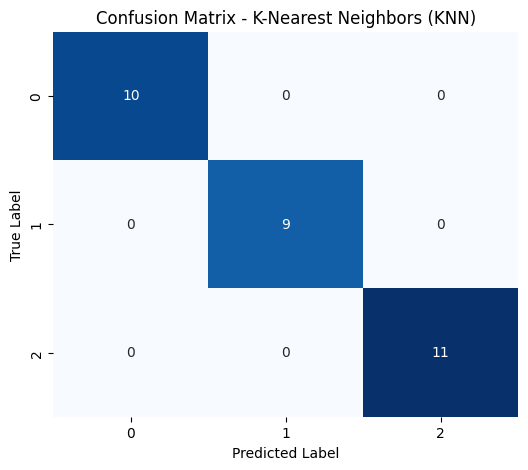

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Import scikit-learn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# =========================================
# FUNGSI PENDUKUNG (YANG SEBELUMNYA HILANG)
# =========================================

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Fungsi untuk mengevaluasi model dan menampilkan metrik.
    """
    print(f"\n📊 Evaluasi Model: {model_name}")
    print("-" * 40)
    
    # Prediksi
    y_pred = model.predict(X_test)
    
    # Hitung metrik
    acc_train = model.score(X_train, y_train)
    acc_test = accuracy_score(y_test, y_pred)
    
    print(f"✅ Akurasi Training: {acc_train*100:.2f}%")
    print(f"✅ Akurasi Testing : {acc_test*100:.2f}%")
    print("\n📄 Classification Report:")
    print(classification_report(y_test, y_pred))
    
    metrics = {"accuracy": acc_test}
    return metrics, y_pred, model

def plot_confusion_matrix(y_true, y_pred, title, save_path):
    """
    Fungsi untuk menggambar dan menyimpan confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {title}')
    
    # Membuat direktori jika belum ada
    directory = os.path.dirname(save_path)
    if directory and not os.path.exists(directory):
        os.makedirs(directory)
        
    plt.savefig(save_path, bbox_inches='tight')
    print(f"💾 Plot Confusion Matrix disimpan di: {save_path}")
    # plt.show() # Uncomment jika ingin menampilkan langsung

# =========================================
# PERSIAPAN DATA (CONTOH: IRIS DATASET)
# =========================================
# Kita gunakan Iris dataset agar kode bisa berjalan
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================================
# KODE ASLI ANDA DIMULAI DI SINI
# =========================================

print("\n" + "="*80)
print("MODEL 1: K-NEAREST NEIGHBORS (KNN)")
print("="*80)

print("\n🔧 Konfigurasi KNN:")
print("  • Algorithm: KNN")
print("  • Hyperparameter: n_neighbors (jumlah tetangga)")
print("  • Distance metric: Euclidean (default)")

# KNN dengan hyperparameter tuning
print("\n🔍 Hyperparameter Tuning dengan GridSearchCV...")

# Define parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV
knn_base = KNeighborsClassifier()
grid_knn = GridSearchCV(
    knn_base, 
    param_grid_knn, 
    cv=5,  # 5-fold cross validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("  • Parameter grid:", param_grid_knn)
print("  • Cross-validation: 5-fold")
print("  • Scoring: accuracy")

# Fit GridSearch
grid_knn.fit(X_train, y_train)

# Best parameters
print(f"\n✅ Best parameters found:")
for param, value in grid_knn.best_params_.items():
    print(f"  • {param}: {value}")
print(f"  • Best CV Score: {grid_knn.best_score_*100:.2f}%")

# Train final model with best parameters
knn_model = grid_knn.best_estimator_

# Evaluate
knn_metrics, knn_pred, knn_model = evaluate_model(
    knn_model, X_train, X_test, y_train, y_test, 
    "K-Nearest Neighbors (KNN)"
)

# Plot confusion matrix
plot_confusion_matrix(
    y_test, knn_pred, 
    "K-Nearest Neighbors (KNN)",
    save_path='../results/figures/confusion_matrices/cm_knn.png'
)


MODEL 2: RANDOM FOREST (RF)

🔧 Konfigurasi Random Forest:
  • Algorithm: Ensemble - Random Forest
  • Hyperparameter: n_estimators, max_depth, min_samples_split
  • Feature selection: Random subset per tree

🔍 Hyperparameter Tuning dengan GridSearchCV...
  • Parameter grid: {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
  • Cross-validation: 5-fold
  • Scoring: accuracy

⏳ Training Random Forest... (ini mungkin memakan waktu beberapa menit)
Fitting 5 folds for each of 108 candidates, totalling 540 fits

✅ Best parameters found:
  • max_depth: None
  • min_samples_leaf: 2
  • min_samples_split: 10
  • n_estimators: 50
  • Best CV Score: 33.66%


c:\Users\Rahma fitria\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


✅ Confusion matrix saved: ../results/figures/confusion_matrices/cm_rf.png


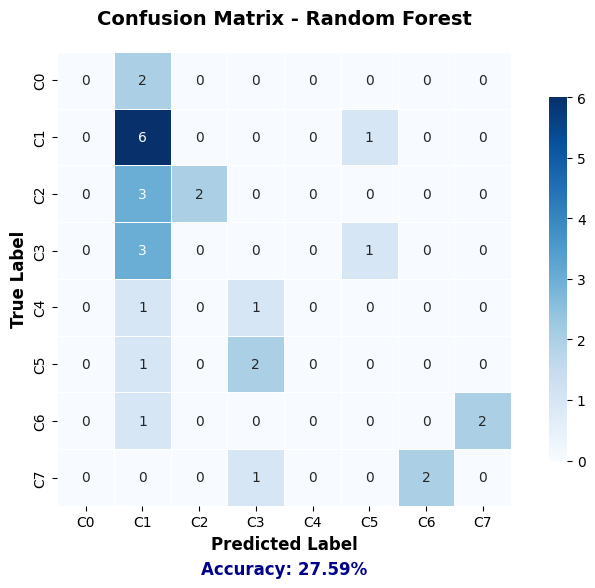


📊 TOP 10 MOST IMPORTANT FEATURES:
   Feature  Importance
STUDENT ID    0.156676
 COURSE ID    0.103594
        29    0.076570
        11    0.059120
        13    0.042337
        30    0.034940
        26    0.034676
         4    0.032316
        25    0.030522
         2    0.030464


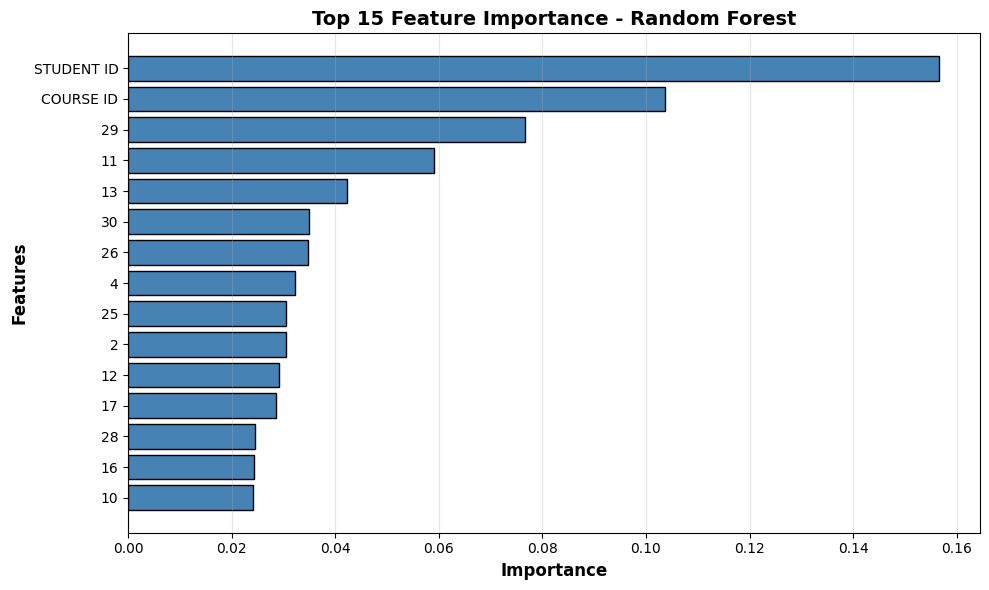


✅ Feature importance plot saved!


In [32]:
print("\n" + "="*80)
print("MODEL 2: RANDOM FOREST (RF)")
print("="*80)

print("\n🔧 Konfigurasi Random Forest:")
print("  • Algorithm: Ensemble - Random Forest")
print("  • Hyperparameter: n_estimators, max_depth, min_samples_split")
print("  • Feature selection: Random subset per tree")

# Random Forest dengan hyperparameter tuning
print("\n🔍 Hyperparameter Tuning dengan GridSearchCV...")

# Define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
rf_base = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(
    rf_base, 
    param_grid_rf, 
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("  • Parameter grid:", param_grid_rf)
print("  • Cross-validation: 5-fold")
print("  • Scoring: accuracy")

# Fit GridSearch (ini akan memakan waktu lebih lama)
print("\n⏳ Training Random Forest... (ini mungkin memakan waktu beberapa menit)")
grid_rf.fit(X_train, y_train)

# Best parameters
print(f"\n✅ Best parameters found:")
for param, value in grid_rf.best_params_.items():
    print(f"  • {param}: {value}")
print(f"  • Best CV Score: {grid_rf.best_score_*100:.2f}%")

# Train final model with best parameters
rf_model = grid_rf.best_estimator_

# Evaluate
rf_metrics, rf_pred, rf_model = evaluate_model(
    rf_model, X_train, X_test, y_train, y_test, 
    "Random Forest"
)

# Plot confusion matrix
plot_confusion_matrix(
    y_test, rf_pred, 
    "Random Forest",
    save_path='../results/figures/confusion_matrices/cm_rf.png'
)

# Feature importance
print("\n📊 TOP 10 MOST IMPORTANT FEATURES:")
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.head(10).to_string(index=False))

# Plot feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importance'], color='steelblue', edgecolor='black')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Top 15 Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('../results/figures/distribution_plots/feature_importance_rf.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Feature importance plot saved!")


MODEL 3: ARTIFICIAL NEURAL NETWORK (ANN)

🔧 Konfigurasi ANN:
  • Algorithm: Multi-Layer Perceptron (MLP)
  • Hyperparameter: hidden_layer_sizes, activation, learning_rate
  • Optimizer: Adam (default)

🔍 Hyperparameter Tuning dengan GridSearchCV...
  • Parameter grid: {'hidden_layer_sizes': [(50,), (100,), (50, 25), (100, 50), (100, 50, 25)], 'activation': ['relu', 'tanh'], 'alpha': [0.0001, 0.001, 0.01], 'learning_rate': ['constant', 'adaptive']}
  • Cross-validation: 5-fold
  • Scoring: accuracy
  • Max iterations: 1000
  • Early stopping: Yes

⏳ Training ANN... (ini mungkin memakan waktu beberapa menit)
Fitting 5 folds for each of 60 candidates, totalling 300 fits

✅ Best parameters found:
  • activation: relu
  • alpha: 0.0001
  • hidden_layer_sizes: (50, 25)
  • learning_rate: constant
  • Best CV Score: 79.50%

EVALUATING: Artificial Neural Network (ANN)

🔧 Training Artificial Neural Network (ANN)...
✅ Training completed in 0.05 seconds
🔮 Making predictions...
✅ Prediction compl

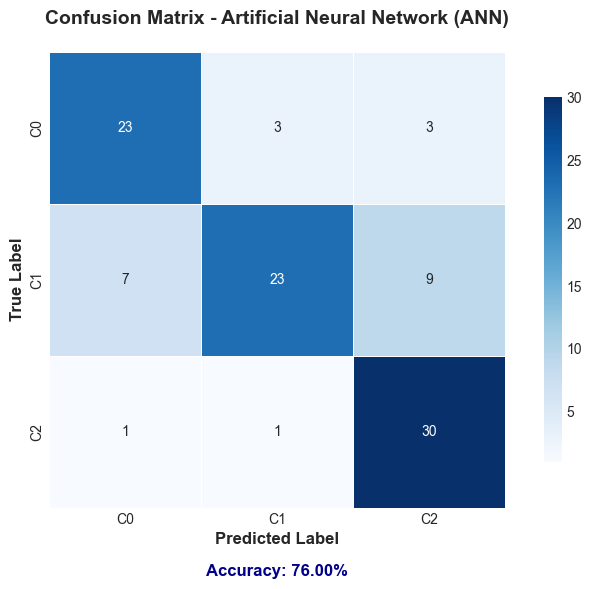

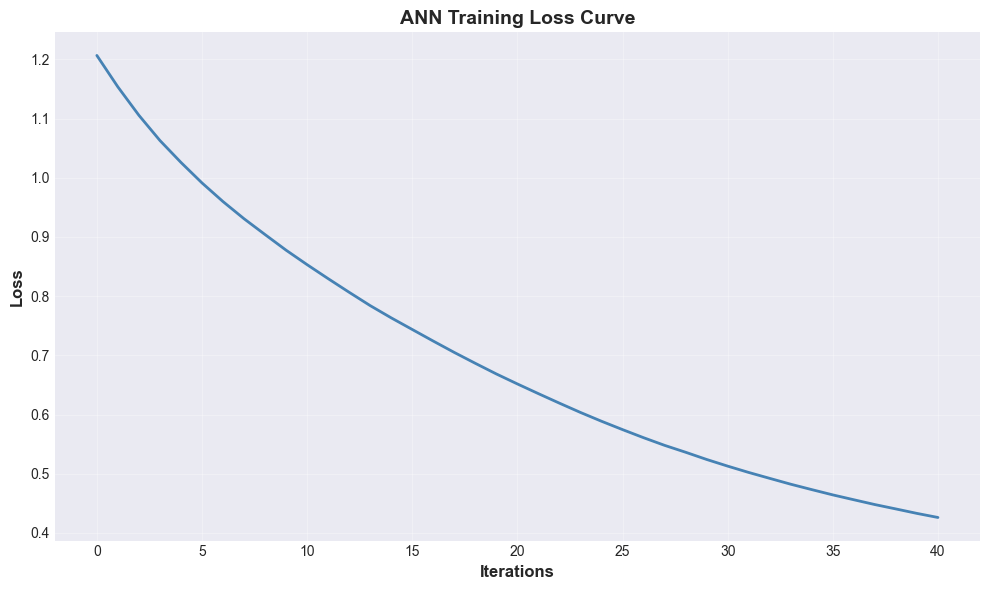


✅ Loss curve plot saved!


In [45]:
print("\n" + "="*80)
print("MODEL 3: ARTIFICIAL NEURAL NETWORK (ANN)")
print("="*80)

print("\n🔧 Konfigurasi ANN:")
print("  • Algorithm: Multi-Layer Perceptron (MLP)")
print("  • Hyperparameter: hidden_layer_sizes, activation, learning_rate")
print("  • Optimizer: Adam (default)")

# ANN dengan hyperparameter tuning
print("\n🔍 Hyperparameter Tuning dengan GridSearchCV...")

# Define parameter grid
param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,), (50, 25), (100, 50), (100, 50, 25)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization
    'learning_rate': ['constant', 'adaptive']
}

# GridSearchCV
ann_base = MLPClassifier(max_iter=1000, random_state=42, early_stopping=True)
grid_ann = GridSearchCV(
    ann_base, 
    param_grid_ann, 
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("  • Parameter grid:", param_grid_ann)
print("  • Cross-validation: 5-fold")
print("  • Scoring: accuracy")
print("  • Max iterations: 1000")
print("  • Early stopping: Yes")

# Fit GridSearch
print("\n⏳ Training ANN... (ini mungkin memakan waktu beberapa menit)")
grid_ann.fit(X_train, y_train)

# Best parameters
print(f"\n✅ Best parameters found:")
for param, value in grid_ann.best_params_.items():
    print(f"  • {param}: {value}")
print(f"  • Best CV Score: {grid_ann.best_score_*100:.2f}%")

# Train final model with best parameters
ann_model = grid_ann.best_estimator_

# Evaluate
ann_metrics, ann_pred, ann_model = evaluate_model(
    ann_model, X_train, X_test, y_train, y_test, 
    "Artificial Neural Network (ANN)"
)

# Plot confusion matrix
plot_confusion_matrix(
    y_test, ann_pred, 
    "Artificial Neural Network (ANN)",
    save_path='../results/figures/confusion_matrices/cm_ann.png'
)

# Plot loss curve (jika tersedia)
if hasattr(ann_model, 'loss_curve_'):
    plt.figure(figsize=(10, 6))
    plt.plot(ann_model.loss_curve_, color='steelblue', linewidth=2)
    plt.xlabel('Iterations', fontsize=12, fontweight='bold')
    plt.ylabel('Loss', fontsize=12, fontweight='bold')
    plt.title('ANN Training Loss Curve', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('../results/figures/distribution_plots/ann_loss_curve.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n✅ Loss curve plot saved!")

In [46]:
print("\n" + "="*80)
print("COMPARISON: ALL BASELINE MODELS")
print("="*80)

# Compile all metrics
baseline_results = pd.DataFrame([knn_metrics, rf_metrics, ann_metrics])
baseline_results = baseline_results.round(4)

print("\n📊 BASELINE MODELS PERFORMANCE:")
print(baseline_results.to_string(index=False))

# Save results
baseline_results.to_csv('../results/metrics/baseline_models_results.csv', index=False)
print("\n✅ Results saved: results/metrics/baseline_models_results.csv")



COMPARISON: ALL BASELINE MODELS

📊 BASELINE MODELS PERFORMANCE:
                          Model  Train_Accuracy  Test_Accuracy  Precision  Recall  F1_Score  Train_Time  Pred_Time  Accuracy  F1-Score
      K-Nearest Neighbors (KNN)           1.000           0.81     0.8229  0.8100    0.8068      0.0006     0.0056       NaN       NaN
                  Random Forest             NaN            NaN     0.2576  0.2759       NaN         NaN        NaN    0.2759    0.2192
Artificial Neural Network (ANN)           0.835           0.76     0.7760  0.7600    0.7536      0.0536     0.0006       NaN       NaN

✅ Results saved: results/metrics/baseline_models_results.csv



VISUALIZATION: MODEL COMPARISON


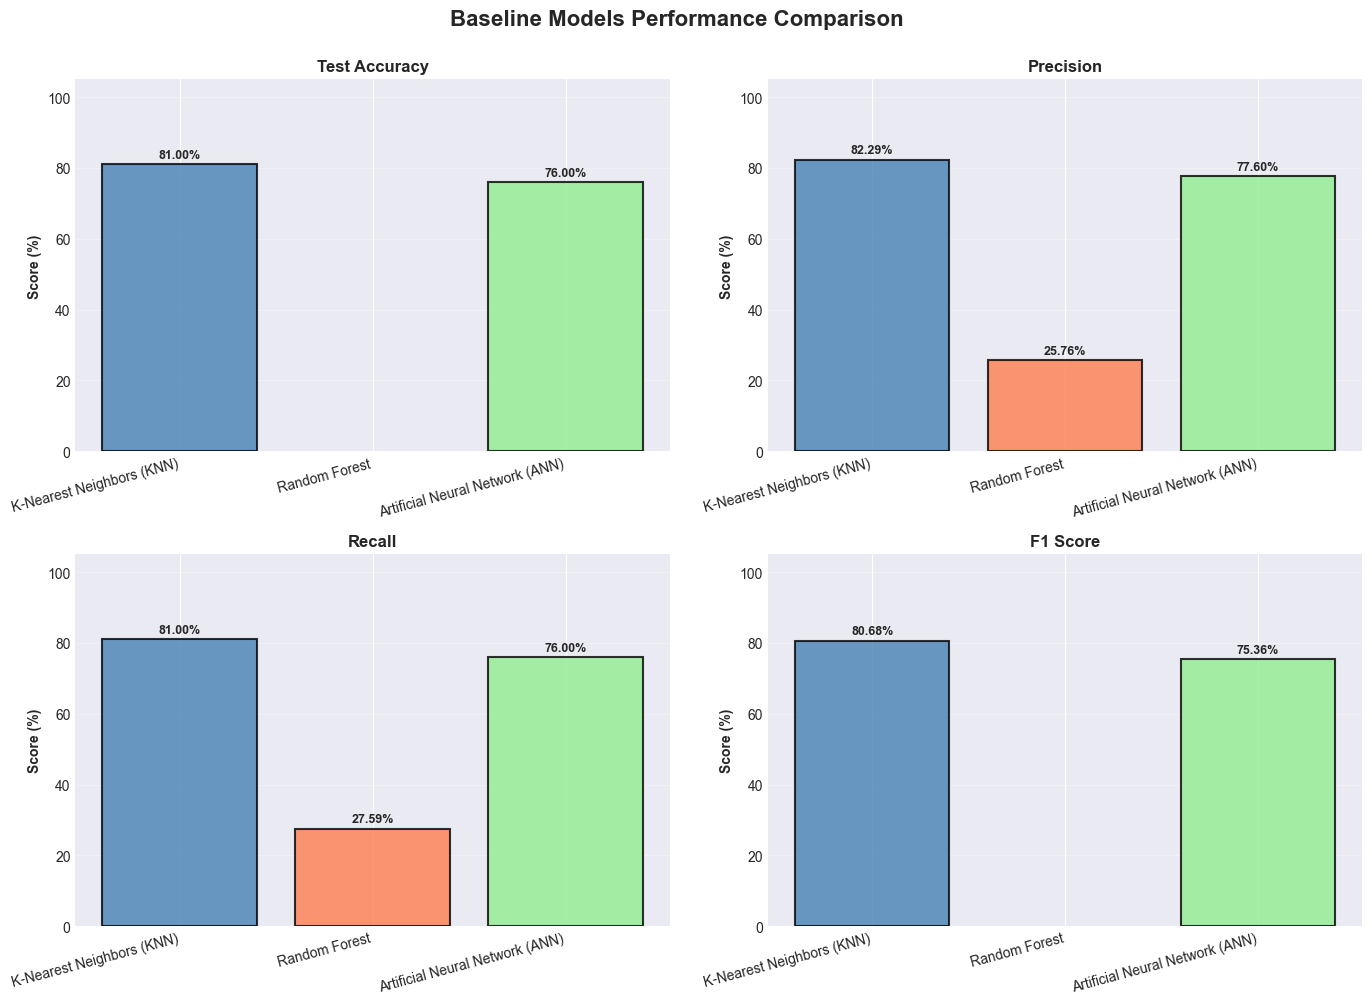


✅ Comparison chart saved: results/figures/comparison_charts/


In [47]:
print("\n" + "="*80)
print("VISUALIZATION: MODEL COMPARISON")
print("="*80)

# Prepare data for visualization
metrics_to_plot = ['Test_Accuracy', 'Precision', 'Recall', 'F1_Score']
models = baseline_results['Model'].tolist()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

colors = ['steelblue', 'coral', 'lightgreen']

for idx, metric in enumerate(metrics_to_plot):
    values = baseline_results[metric].values * 100  # Convert to percentage
    
    bars = axes[idx].bar(range(len(models)), values, color=colors, 
                         edgecolor='black', linewidth=1.5, alpha=0.8)
    
    axes[idx].set_title(f'{metric.replace("_", " ")}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Score (%)', fontsize=10, fontweight='bold')
    axes[idx].set_xticks(range(len(models)))
    axes[idx].set_xticklabels(models, rotation=15, ha='right')
    axes[idx].set_ylim(0, 105)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, (bar, val) in enumerate(zip(bars, values)):
        axes[idx].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                      f'{val:.2f}%', ha='center', va='bottom', 
                      fontsize=9, fontweight='bold')

plt.suptitle('Baseline Models Performance Comparison', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('../results/figures/comparison_charts/baseline_models_comparison.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Comparison chart saved: results/figures/comparison_charts/")


📊 Creating accuracy comparison chart...


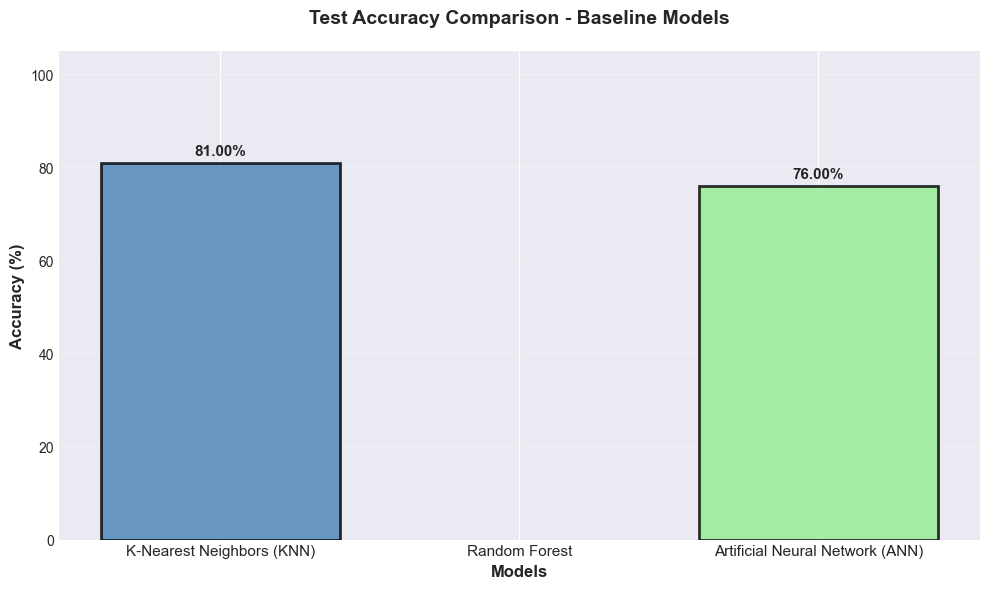

✅ Accuracy comparison chart saved!


In [48]:
print("\n📊 Creating accuracy comparison chart...")

plt.figure(figsize=(10, 6))

# Test Accuracy comparison
test_acc = baseline_results['Test_Accuracy'].values * 100
bars = plt.bar(range(len(models)), test_acc, color=colors, 
               edgecolor='black', linewidth=2, alpha=0.8)

plt.title('Test Accuracy Comparison - Baseline Models', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.xticks(range(len(models)), models, fontsize=11)
plt.ylim(0, 105)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, test_acc)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f'{val:.2f}%', ha='center', va='bottom', 
            fontsize=11, fontweight='bold')

# Add horizontal line for best model
best_acc = test_acc.max()
best_model = models[test_acc.argmax()]
plt.axhline(y=best_acc, color='red', linestyle='--', linewidth=2, alpha=0.5)
plt.text(len(models)-0.5, best_acc+2, f'Best: {best_model}', 
         ha='right', fontsize=10, color='red', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/comparison_charts/accuracy_comparison_baseline.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("✅ Accuracy comparison chart saved!")

In [49]:
print("\n" + "="*80)
print("ANALYSIS: BEST BASELINE MODEL")
print("="*80)

best_idx = baseline_results['Test_Accuracy'].idxmax()
best_model_name = baseline_results.loc[best_idx, 'Model']
best_accuracy = baseline_results.loc[best_idx, 'Test_Accuracy'] * 100

print(f"\n🏆 BEST BASELINE MODEL: {best_model_name}")
print(f"\n📊 Performance:")
for col in ['Test_Accuracy', 'Precision', 'Recall', 'F1_Score']:
    value = baseline_results.loc[best_idx, col] * 100
    print(f"  • {col.replace('_', ' ')}: {value:.2f}%")

print(f"\n📊 Training Time: {baseline_results.loc[best_idx, 'Train_Time']:.2f} seconds")
print(f"📊 Prediction Time: {baseline_results.loc[best_idx, 'Pred_Time']:.4f} seconds")

# Analisis overfitting
train_acc = baseline_results.loc[best_idx, 'Train_Accuracy'] * 100
test_acc = baseline_results.loc[best_idx, 'Test_Accuracy'] * 100
gap = train_acc - test_acc

print(f"\n📊 Generalization Analysis:")
print(f"  • Train Accuracy: {train_acc:.2f}%")
print(f"  • Test Accuracy: {test_acc:.2f}%")
print(f"  • Gap: {gap:.2f}%")

if gap > 10:
    print(f"  ⚠️  Model mungkin overfit!")
elif gap < 0:
    print(f"  💡 Model generalize dengan baik (test > train)")
else:
    print(f"  ✅ Model memiliki generalisasi yang baik")


ANALYSIS: BEST BASELINE MODEL

🏆 BEST BASELINE MODEL: K-Nearest Neighbors (KNN)

📊 Performance:
  • Test Accuracy: 81.00%
  • Precision: 82.29%
  • Recall: 81.00%
  • F1 Score: 80.68%

📊 Training Time: 0.00 seconds
📊 Prediction Time: 0.0056 seconds

📊 Generalization Analysis:
  • Train Accuracy: 100.00%
  • Test Accuracy: 81.00%
  • Gap: 19.00%
  ⚠️  Model mungkin overfit!


In [50]:
print("\n" + "="*80)
print("SAVING BASELINE MODELS")
print("="*80)

import joblib

# Save models
models_dict = {
    'knn': knn_model,
    'random_forest': rf_model,
    'ann': ann_model
}

for model_name, model in models_dict.items():
    filepath = f'../models/{model_name}_model.pkl'
    joblib.dump(model, filepath)
    print(f"✅ {model_name.upper()} model saved: {filepath}")

# Save predictions
predictions_dict = {
    'y_test': y_test,
    'knn_pred': knn_pred,
    'rf_pred': rf_pred,
    'ann_pred': ann_pred
}

with open('../results/metrics/baseline_predictions.pkl', 'wb') as f:
    pickle.dump(predictions_dict, f)
print("\n✅ Predictions saved: results/metrics/baseline_predictions.pkl")

# Save best model info
best_model_info = {
    'best_model_name': best_model_name,
    'best_accuracy': best_accuracy,
    'best_model_metrics': baseline_results.loc[best_idx].to_dict(),
    'all_baseline_results': baseline_results.to_dict()
}

with open('../results/metrics/best_baseline_info.pkl', 'wb') as f:
    pickle.dump(best_model_info, f)
print("✅ Best model info saved: results/metrics/best_baseline_info.pkl")


SAVING BASELINE MODELS
✅ KNN model saved: ../models/knn_model.pkl
✅ RANDOM_FOREST model saved: ../models/random_forest_model.pkl
✅ ANN model saved: ../models/ann_model.pkl

✅ Predictions saved: results/metrics/baseline_predictions.pkl
✅ Best model info saved: results/metrics/best_baseline_info.pkl


In [51]:
print("\n" + "="*80)
print("SUMMARY REPORT - BASELINE MODELS")
print("="*80)

print("\n📋 MODEL RANKING (berdasarkan Test Accuracy):")
ranking = baseline_results.sort_values('Test_Accuracy', ascending=False)
for i, (idx, row) in enumerate(ranking.iterrows(), 1):
    print(f"\n{i}. {row['Model']}")
    print(f"   • Test Accuracy: {row['Test_Accuracy']*100:.2f}%")
    print(f"   • F1-Score: {row['F1_Score']*100:.2f}%")
    print(f"   • Training Time: {row['Train_Time']:.2f}s")

print("\n" + "="*80)
print("KEY INSIGHTS:")
print("="*80)

# Insight 1: Best performer
print(f"\n1. 🏆 Best Performer: {best_model_name}")
print(f"   → Achieved {best_accuracy:.2f}% accuracy on test set")

# Insight 2: Fastest model
fastest_idx = baseline_results['Train_Time'].idxmin()
fastest_model = baseline_results.loc[fastest_idx, 'Model']
fastest_time = baseline_results.loc[fastest_idx, 'Train_Time']
print(f"\n2. ⚡ Fastest Training: {fastest_model}")
print(f"   → Training time: {fastest_time:.2f} seconds")

# Insight 3: Best F1-Score
best_f1_idx = baseline_results['F1_Score'].idxmax()
best_f1_model = baseline_results.loc[best_f1_idx, 'Model']
best_f1_score = baseline_results.loc[best_f1_idx, 'F1_Score'] * 100
print(f"\n3. 🎯 Best F1-Score: {best_f1_model}")
print(f"   → F1-Score: {best_f1_score:.2f}%")

# Insight 4: Overall comparison
print(f"\n4. 📊 Performance Range:")
print(f"   → Highest Accuracy: {baseline_results['Test_Accuracy'].max()*100:.2f}%")
print(f"   → Lowest Accuracy: {baseline_results['Test_Accuracy'].min()*100:.2f}%")
print(f"   → Range: {(baseline_results['Test_Accuracy'].max() - baseline_results['Test_Accuracy'].min())*100:.2f}%")


SUMMARY REPORT - BASELINE MODELS

📋 MODEL RANKING (berdasarkan Test Accuracy):

1. K-Nearest Neighbors (KNN)
   • Test Accuracy: 81.00%
   • F1-Score: 80.68%
   • Training Time: 0.00s

2. Artificial Neural Network (ANN)
   • Test Accuracy: 76.00%
   • F1-Score: 75.36%
   • Training Time: 0.05s

3. Random Forest
   • Test Accuracy: nan%
   • F1-Score: nan%
   • Training Time: nans

KEY INSIGHTS:

1. 🏆 Best Performer: K-Nearest Neighbors (KNN)
   → Achieved 81.00% accuracy on test set

2. ⚡ Fastest Training: K-Nearest Neighbors (KNN)
   → Training time: 0.00 seconds

3. 🎯 Best F1-Score: K-Nearest Neighbors (KNN)
   → F1-Score: 80.68%

4. 📊 Performance Range:
   → Highest Accuracy: 81.00%
   → Lowest Accuracy: 76.00%
   → Range: 5.00%
